# JAX Example for Interpolation

In [1]:
import jax.numpy as jnp
from jax import vmap

import matplotlib.pyplot as plt

from jax_geometry.manifolds import nSphere, LambdaManifold
from jax_geometry.prob_geodesics import ProbGEORCE, ProbGEORCE_Embedded, ProbGEORCE_Euclidean
from jax_geometry.prob_geodesics import ProbGEORCE_Adaptive, ProbGEORCE_Embedded_Adaptive, ProbGEORCE_Euclidean_Adaptive

from jax_geometry.prob_means import ProbGEORCEFM, ProbGEORCEFM_Embedded, ProbGEORCEFM_Euclidean
from jax_geometry.prob_means import ProbGEORCEFM_Adaptive, ProbGEORCEFM_Embedded_Adaptive, ProbGEORCEFM_Euclidean_Adaptive

## Defining manifold and funcitons

### Define manifold

In [2]:
#Simple Euclidean example
M = nSphere(dim=2)
z0 = -jnp.ones(2, dtype=jnp.float32)
zN = jnp.ones(2, dtype=jnp.float32)

### Regularization function

In [3]:
#error to a unit circle
def S_fun(x):

    return (jnp.sum(x**2, axis=-1)-1.0)**2


def reg_fun(x):

    return jnp.sum(S_fun(x))
    

### Projection function

In [4]:
#dummy projection function
def proj_fun(x):

    return x
    

## Computing geodesics

### ProbGEORCE

In [5]:
ProbGeodesic = ProbGEORCE(M=M,
                          reg_fun=reg_fun,
                          init_fun=None,
                          lam=1.0,
                          N=100,
                          tol=1e-4,
                          max_iter=1000,
                          line_search_params = {'rho': 0.5},
                         )

In [6]:
ProbGeodesic_adaptive = ProbGEORCE_Adaptive(M=M,
                                            reg_fun=reg_fun,
                                            init_fun=None,
                                            lam=1.0,
                                            N=100,
                                            tol=1e-4,
                                            max_iter=100,
                                            lr_rate=0.1,
                                            beta1=0.5,
                                            beta2=0.5,
                                            eps=1e-8,
                                           )

In [7]:
curve_adaptive = ProbGeodesic_adaptive(z0,zN)

In [8]:
curve = ProbGeodesic(z0,zN)

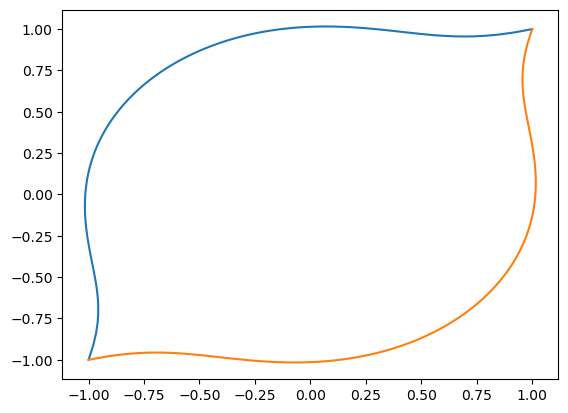

In [9]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(curve_adaptive[:,0], curve_adaptive[:,1])

### ProbGEORCE Euclidean

In [10]:
ProbGeodesic = ProbGEORCE_Euclidean(reg_fun=reg_fun,
                                    init_fun=None,
                                    lam=10.0,
                                    N=100,
                                    tol=1e-4,
                                    max_iter=1000,
                                    line_search_params = {'rho': 0.5},
                                   )

In [11]:
curve = ProbGeodesic(z0,zN)

In [12]:
ProbGeodesic_adaptive = ProbGEORCE_Euclidean_Adaptive(reg_fun=reg_fun,
                                                      init_fun=None,
                                                      lam=10.0,
                                                      N=100,
                                                      tol=1e-4,
                                                      max_iter=1000,
                                                      lr_rate=0.1,
                                                      beta1=0.5,
                                                      beta2=0.5,
                                                      eps=1e-8,
                                                     )

In [13]:
curve_adaptive = ProbGeodesic_adaptive(z0,zN)

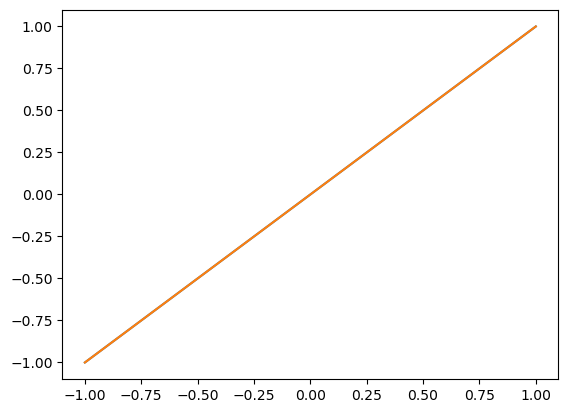

In [14]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(curve_adaptive[:,0], curve_adaptive[:,1])

### ProbGEORCE Embedded

In [15]:
def metric_matrix(x):

    if x.ndim == 1:
        return M.G(x)
    else:
        return vmap(M.G)(x)

ProbGeodesic = ProbGEORCE_Embedded(metric_matrix=metric_matrix,
                                   reg_fun=reg_fun,
                                   proj_fun=proj_fun,
                                   init_fun=None,
                                   lam1=1.0,
                                   lam2=0.0,
                                   N=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {'rho': 0.5},
                                  )

In [16]:
curve = ProbGeodesic(z0,zN)

In [17]:
ProbGeodesic_adaptive = ProbGEORCE_Embedded_Adaptive(metric_matrix=metric_matrix,
                                                     reg_fun=reg_fun,
                                                     proj_fun=proj_fun,
                                                     init_fun=None,
                                                     lam1=1.0,
                                                     lam2=0.0,
                                                     N=100,
                                                     tol=1e-4,
                                                     max_iter=100,
                                                     lr_rate=0.1,
                                                     beta1=0.5,
                                                     beta2=0.5,
                                                     eps=1e-8,
                                                    )

In [18]:
curve_adaptive = ProbGeodesic_adaptive(z0,zN)

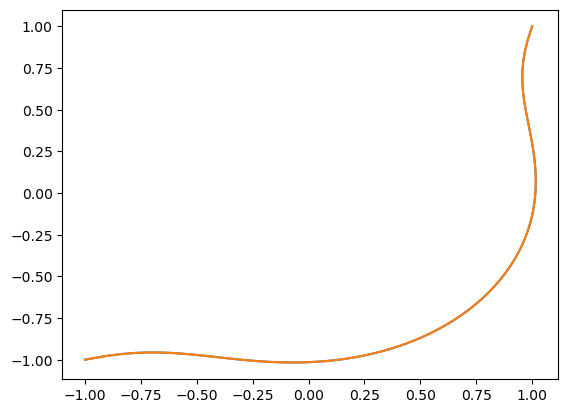

In [19]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(curve_adaptive[:,0], curve_adaptive[:,1])

## ODE Solution

In [20]:
M = nSphere(dim=2)
lamM = LambdaManifold(M=M,
                      S=S_fun,
                      lam=1.0)

In [21]:
test = lamM.Exp_ode(-jnp.ones(2),10*jnp.array([1.0,-0.5]))

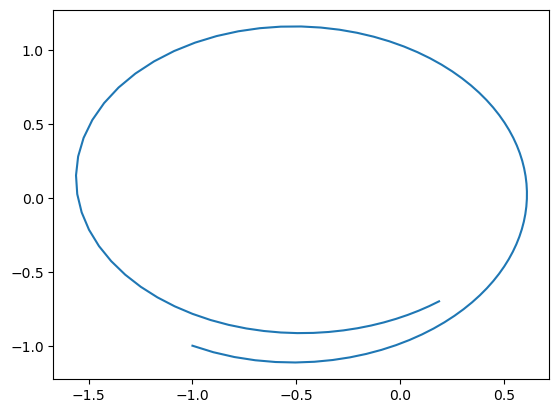

In [22]:
plt.plot(test[:,0], test[:,1])

## Computing means

In [23]:
theta = jnp.linspace(0,2*jnp.pi,10)
x1 = jnp.cos(theta)
x2 = jnp.sin(theta)
data = jnp.vstack((x1,x2)).T

### Prob_GEORCE_FM

In [24]:
prob_mean = ProbGEORCEFM(M=M,
                         reg_fun=reg_fun,
                         init_fun=None,
                         lam=0.0,
                         N_grid=100,
                         tol=1e-4,
                         max_iter=1000,
                         line_search_params = {},
                         parallel=True,
                        )

In [25]:
z_mu, zi = prob_mean(data)

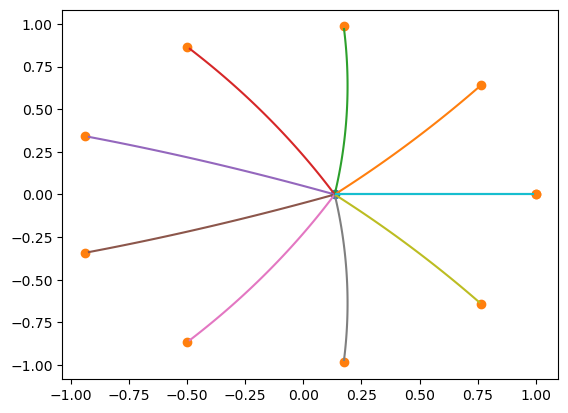

In [26]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [27]:
prob_mean_adaptive = ProbGEORCEFM_Adaptive(M=M,
                                           reg_fun=reg_fun,
                                           init_fun=None,
                                           lam=0.0,
                                  N_grid=100,
                                  tol=1e-4,
                                  max_iter=1000,
                                  lr_rate=0.1,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                  parallel=True,
                                 )

In [28]:
z_mu, zi = prob_mean_adaptive(data)

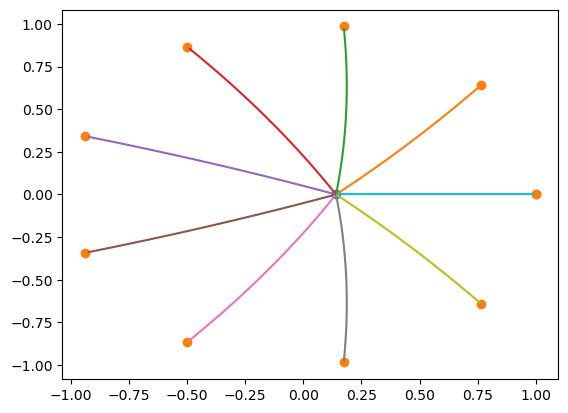

In [29]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

### Prob GEORCE_FM Euclidean

In [30]:
prob_mean = ProbGEORCEFM_Euclidean(reg_fun=reg_fun,
                                   init_fun=None,
                                   lam=100.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {},
                                   parallel=True,
                                  )

In [31]:
z_mu, zi = prob_mean(data)

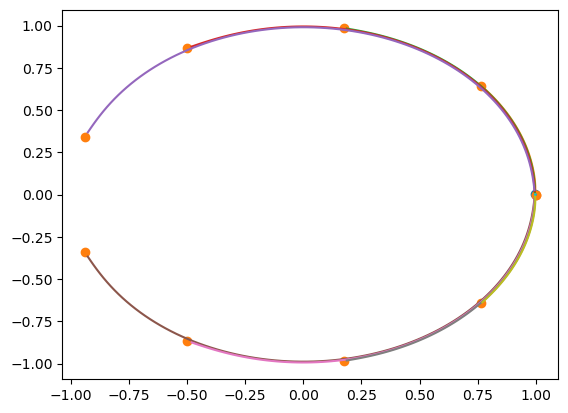

In [32]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [33]:
prob_mean_adaptive = ProbGEORCEFM_Euclidean_Adaptive(reg_fun=reg_fun,
                                   init_fun=None,
                                   lam=100.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   lr_rate=0.1,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                   parallel=True,
                                  )

In [34]:
z_mu, zi = prob_mean_adaptive(data)

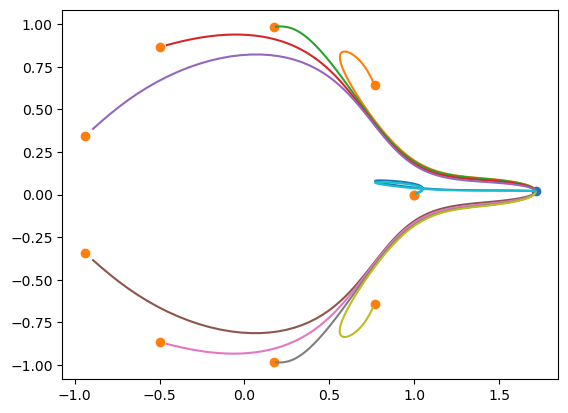

In [35]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

### Prob GEORCE_FM Embedded

In [36]:
prob_mean = ProbGEORCEFM_Embedded(metric_matrix=M.G,
                                  proj_fun=proj_fun,
                                  reg_fun=reg_fun,
                                   init_fun=None,
                                   lam1=10.0,
                                  lam2=10.0,
                                   N_grid=100,
                                   tol=1e-4,
                                   max_iter=1000,
                                   line_search_params = {},
                                   parallel=True,
                                  )

In [37]:
z_mu, zi = prob_mean(data)

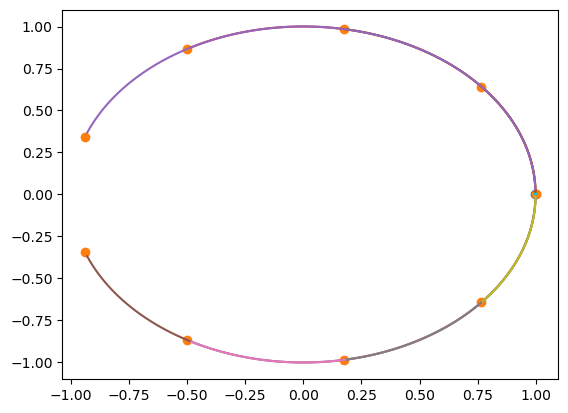

In [38]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])

In [39]:
prob_mean_adaptive = ProbGEORCEFM_Embedded_Adaptive(metric_matrix=M.G,
                                  proj_fun=proj_fun,
                                  reg_fun=reg_fun,
                                  init_fun=None,
                                  lam1=1.0,
                                  lam2=1.0,
                                  N_grid=100,
                                  tol=1e-4,
                                  max_iter=1000,
                                  lr_rate=0.1,
                                  beta1=0.5,
                                  beta2=0.5,
                                  eps=1e-8,
                                  parallel=True,
                                 )

In [40]:
z_mu, zi = prob_mean_adaptive(data)

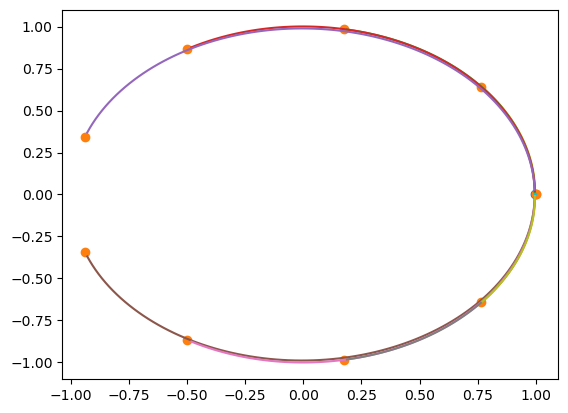

In [41]:
plt.scatter(z_mu[0], z_mu[1])
plt.scatter(data[:,0], data[:,1])
for curve in zi:
    plt.plot(curve[:,0], curve[:,1])